In [17]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising (1).csv


In [ ]:
import pandas as pd

# Load dataset into DataFrame
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# Dataset shape and column info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape: (200, 5)

Columns: ['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

Data types:
 Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

Missing values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [ ]:
# Drop the unnecessary index column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Confirm it's gone
print(df.columns)

# Get basic stats
df.describe()

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


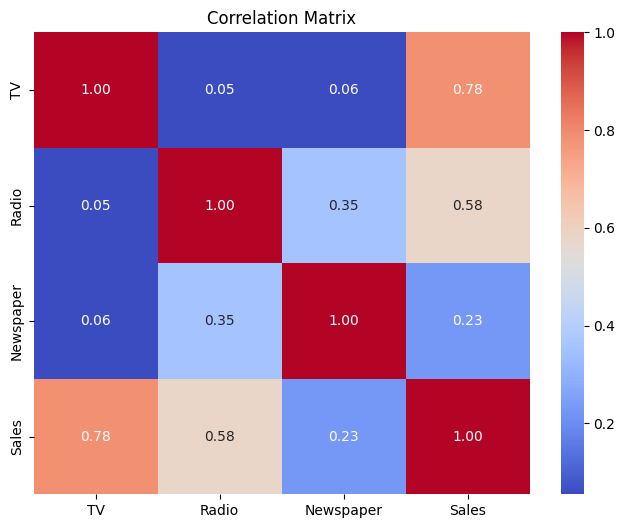

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

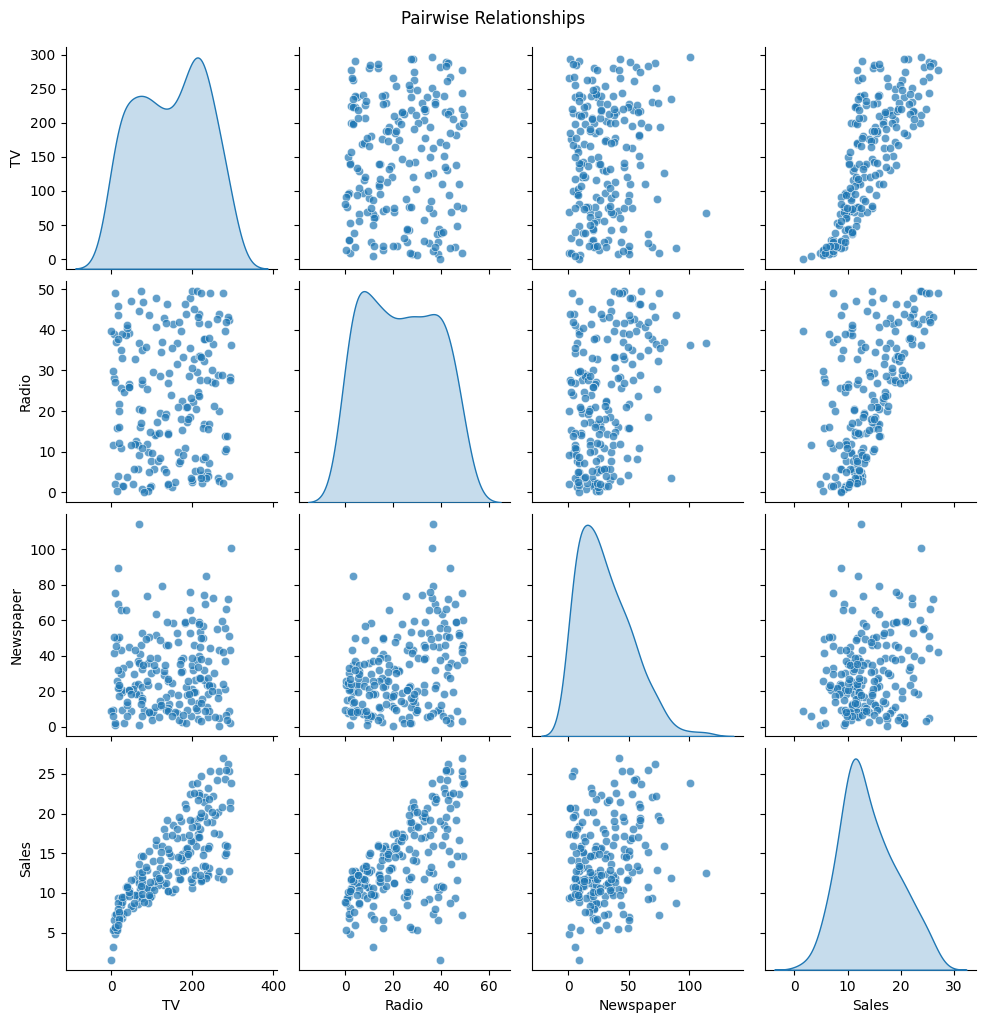

In [ ]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.7})
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

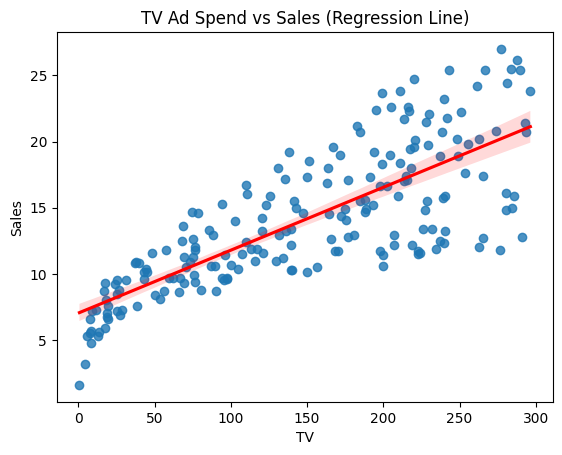

In [ ]:
sns.regplot(data=df, x='TV', y='Sales', line_kws={"color": "red"})
plt.title('TV Ad Spend vs Sales (Regression Line)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (160, 3)
Testing data shape: (40, 3)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.899438024100912
Mean Squared Error: 3.1740973539761033


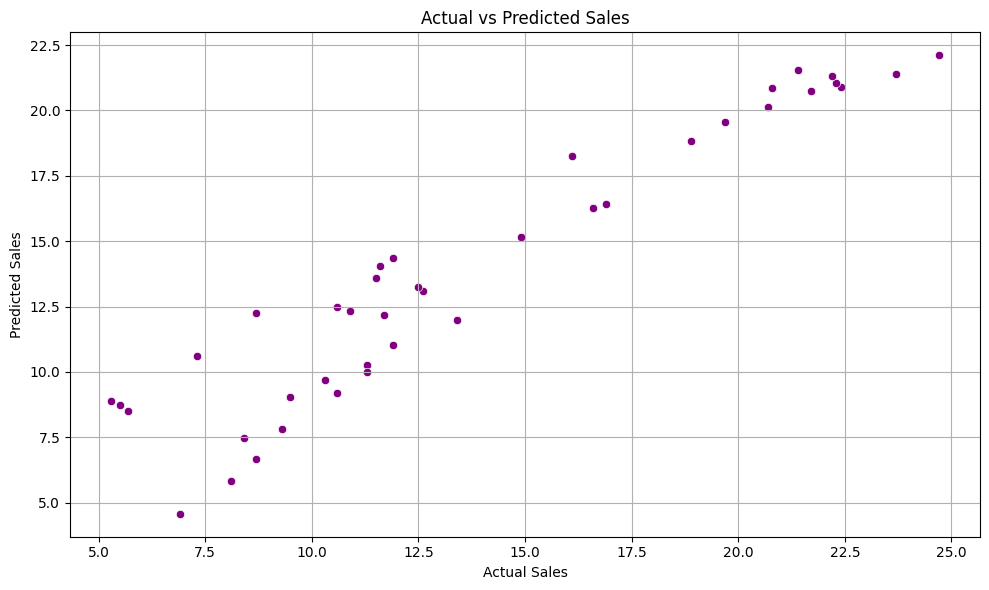

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()